In [1]:
println("hello fine shyt")

hello fine shyt


In [11]:
using Graphs
using Bloqade
using Random
using GenericTensorNetworks
using Optim
using Bloqade.CairoMakie

In [4]:
import Pkg; Pkg.add("Graphs"); 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [5]:
Pkg.add("Bloqade"); Pkg.add("Random"); Pkg.add("GenericTensorNetworks"); Pkg.add("Optim"); Pkg.add("Bloqade.CairoMakie")

   Resolving package versions...
   Installed JpegTurbo_jll ─────────────────────── v3.1.1+0
   Installed OrdinaryDiffEqRKN ─────────────────── v1.1.0
   Installed ImageIO ───────────────────────────── v0.6.9
   Installed Calculus ──────────────────────────── v0.5.2
   Installed LuxorGraphPlot ────────────────────── v0.5.1
   Installed AxisArrays ────────────────────────── v0.4.7
   Installed TiffImages ────────────────────────── v0.11.3
   Installed OrdinaryDiffEqStabilizedRK ────────── v1.1.0
   Installed x265_jll ──────────────────────────── v3.5.0+0
   Installed libfdk_aac_jll ────────────────────── v2.0.3+0
   Installed Libmount_jll ──────────────────────── v2.41.0+0
   Installed OrdinaryDiffEqRosenbrock ──────────── v1.9.0
   Installed YaoPlots ──────────────────────────── v0.9.4
   Installed HypergeometricFunctions ───────────── v0.3.28
   Installed OffsetArrays ──────────────────────── v1.16.0
   Installed JpegTurbo ─────────────────────────── v0.1.6
   Installed LERC_jll ─────

LoadError: The following package names could not be resolved:
 * GenericTensornetworks (not found in project, manifest or registry)
[36m   Suggestions:[39m [0m[1mG[22m[0m[1me[22m[0m[1mn[22m[0m[1me[22m[0m[1mr[22m[0m[1mi[22m[0m[1mc[22m[0m[1mT[22m[0m[1me[22m[0m[1mn[22m[0m[1ms[22m[0m[1mo[22m[0m[1mr[22m[0m[1mN[22m[0m[1me[22m[0m[1mt[22m[0m[1mw[22m[0m[1mo[22m[0m[1mr[22m[0m[1mk[22m[0m[1ms[22m SimpleTensorNetworks ITensorNetworks

In [7]:
Pkg.add("GenericTensorNetworks");

   Resolving package versions...
   Installed DelimitedFiles ──────── v1.9.1
   Installed IntegerMathUtils ────── v0.1.2
   Installed Primes ──────────────── v0.5.7
   Installed TropicalNumbers ─────── v0.6.3
   Installed ProblemReductions ───── v0.3.3
   Installed Polynomials ─────────── v4.0.19
   Installed GenericTensorNetworks ─ v4.0.1
    Updating `~/.julia/environments/v1.11/Project.toml`
  [3521c873] + GenericTensorNetworks v4.0.1
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [8bb1440f] + DelimitedFiles v1.9.1
  [3521c873] + GenericTensorNetworks v4.0.1
  [18e54dd8] + IntegerMathUtils v0.1.2
  [f27b6e38] + Polynomials v4.0.19
  [27ebfcd6] + Primes v0.5.7
  [899c297d] + ProblemReductions v0.3.3
  [b3a74e9c] + TropicalNumbers v0.6.3
Precompiling project...
    582.6 ms  ✓ TropicalNumbers
    279.5 ms  ✓ IntegerMathUtils
    278.4 ms  ✓ DelimitedFiles
    429.1 ms  ✓ Primes
   1679.5 ms  ✓ ProblemReductions
   6956.2 ms  ✓ Polynomials
    832.3 ms  ✓ Polynomials → Poly

In [10]:
Pkg.add("Optim")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [89]:
Random.seed!(2)
atoms = generate_sites(SquareLattice(), 4, 4; scale = 4.5) |> random_dropout(0.2)
typeof(atoms)

AtomList{2, Float64}

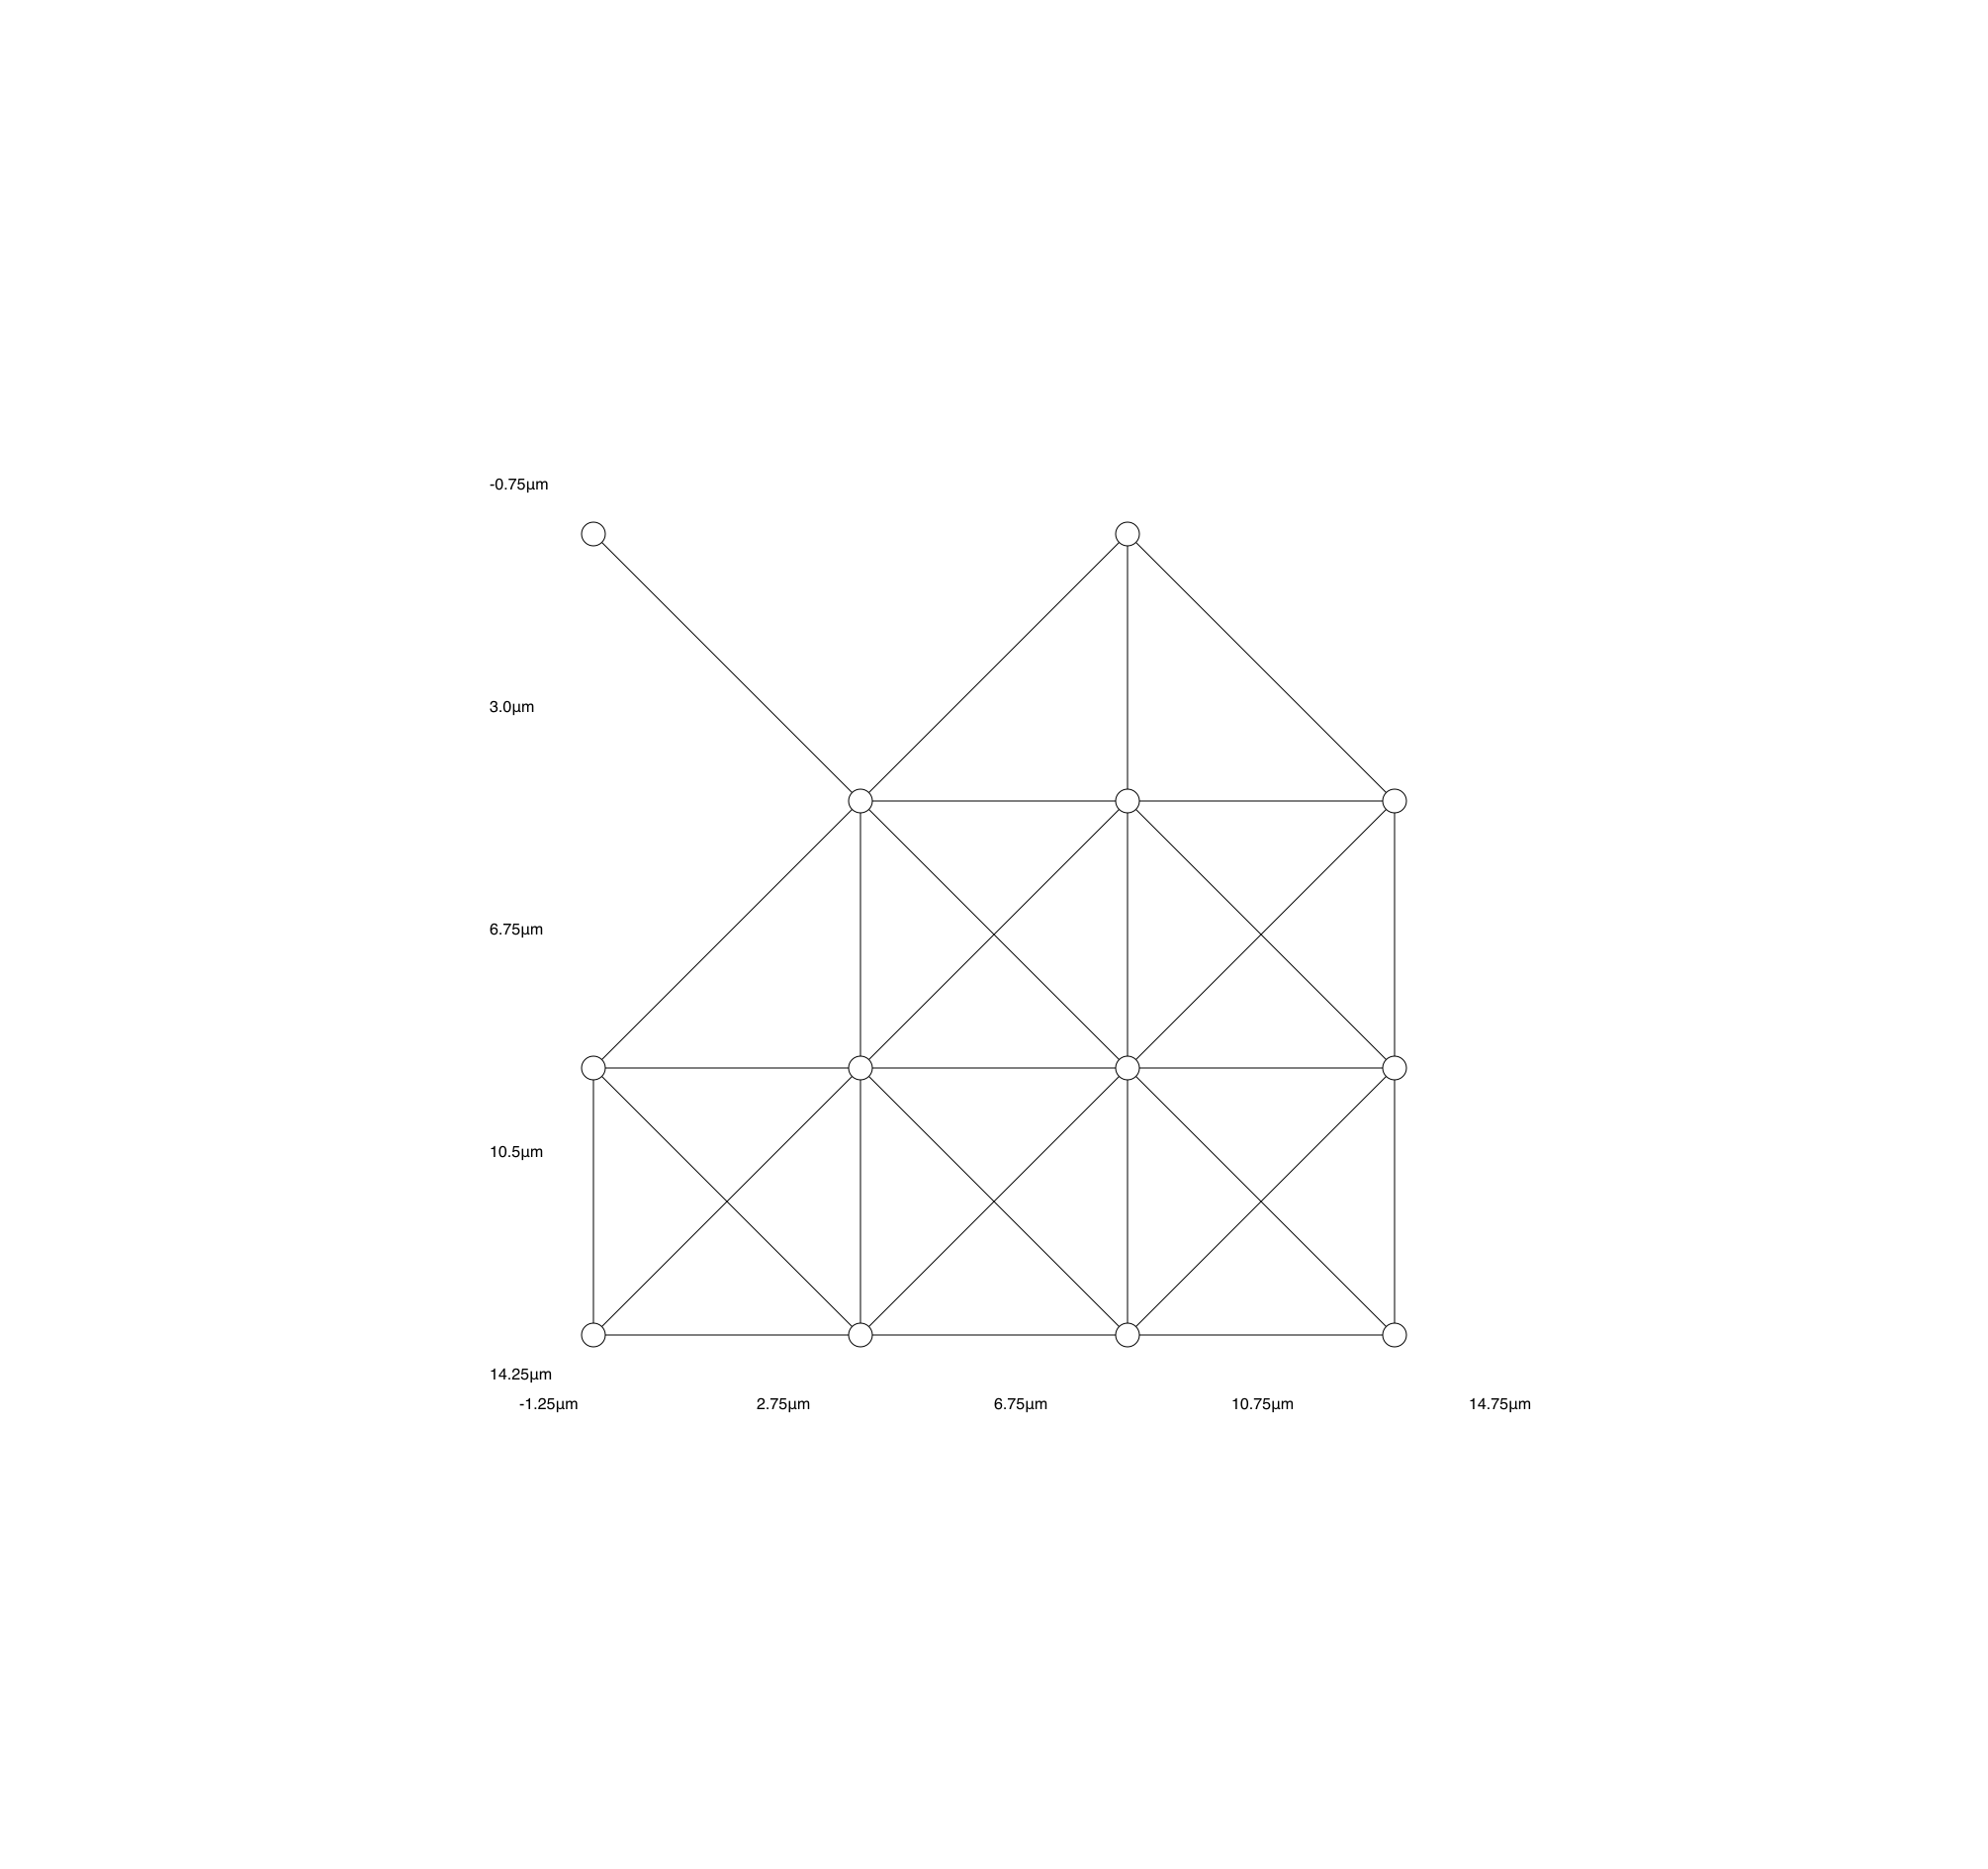

In [90]:
R = 7.5
Bloqade.plot(atoms, blockade_radius = R)

In [91]:
graph = BloqadeMIS.unit_disk_graph(atoms, R)
independent_set_problem = IndependentSet(graph)
mis_size_and_counting = GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem), ConfigsMax())[]

(4.0, {1100000010100, 1001000000101, 1100000000101, 1000100000101, 1100010010000, 1001010000001, 1100010000001, 1000110000001, 1100000011000, 1001000001001, 1100000001001, 1000100001001, 1100001010000, 1100001000001, 1000101000001, 0010100000101, 0010100001001, 1001010000010, 1100010000010, 1000110000010, 1001000001010, 1100000001010, 1000100001010, 0010100001010, 1100010100000, 1100000101000})ₜ

In [92]:
#Pkg.add("BenchmarkTools")
#using BenchmarkTools

In [93]:
@btime GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem), CountingMax())[]

  574.166 μs (24859 allocations: 1.14 MiB)


(4.0, 26.0)ₜ

In [94]:
MIS_config = mis_size_and_counting.c[1]
println(MIS_config)
println(typeof(MIS_config))

1100000010100
StaticBitVector{13, 1}


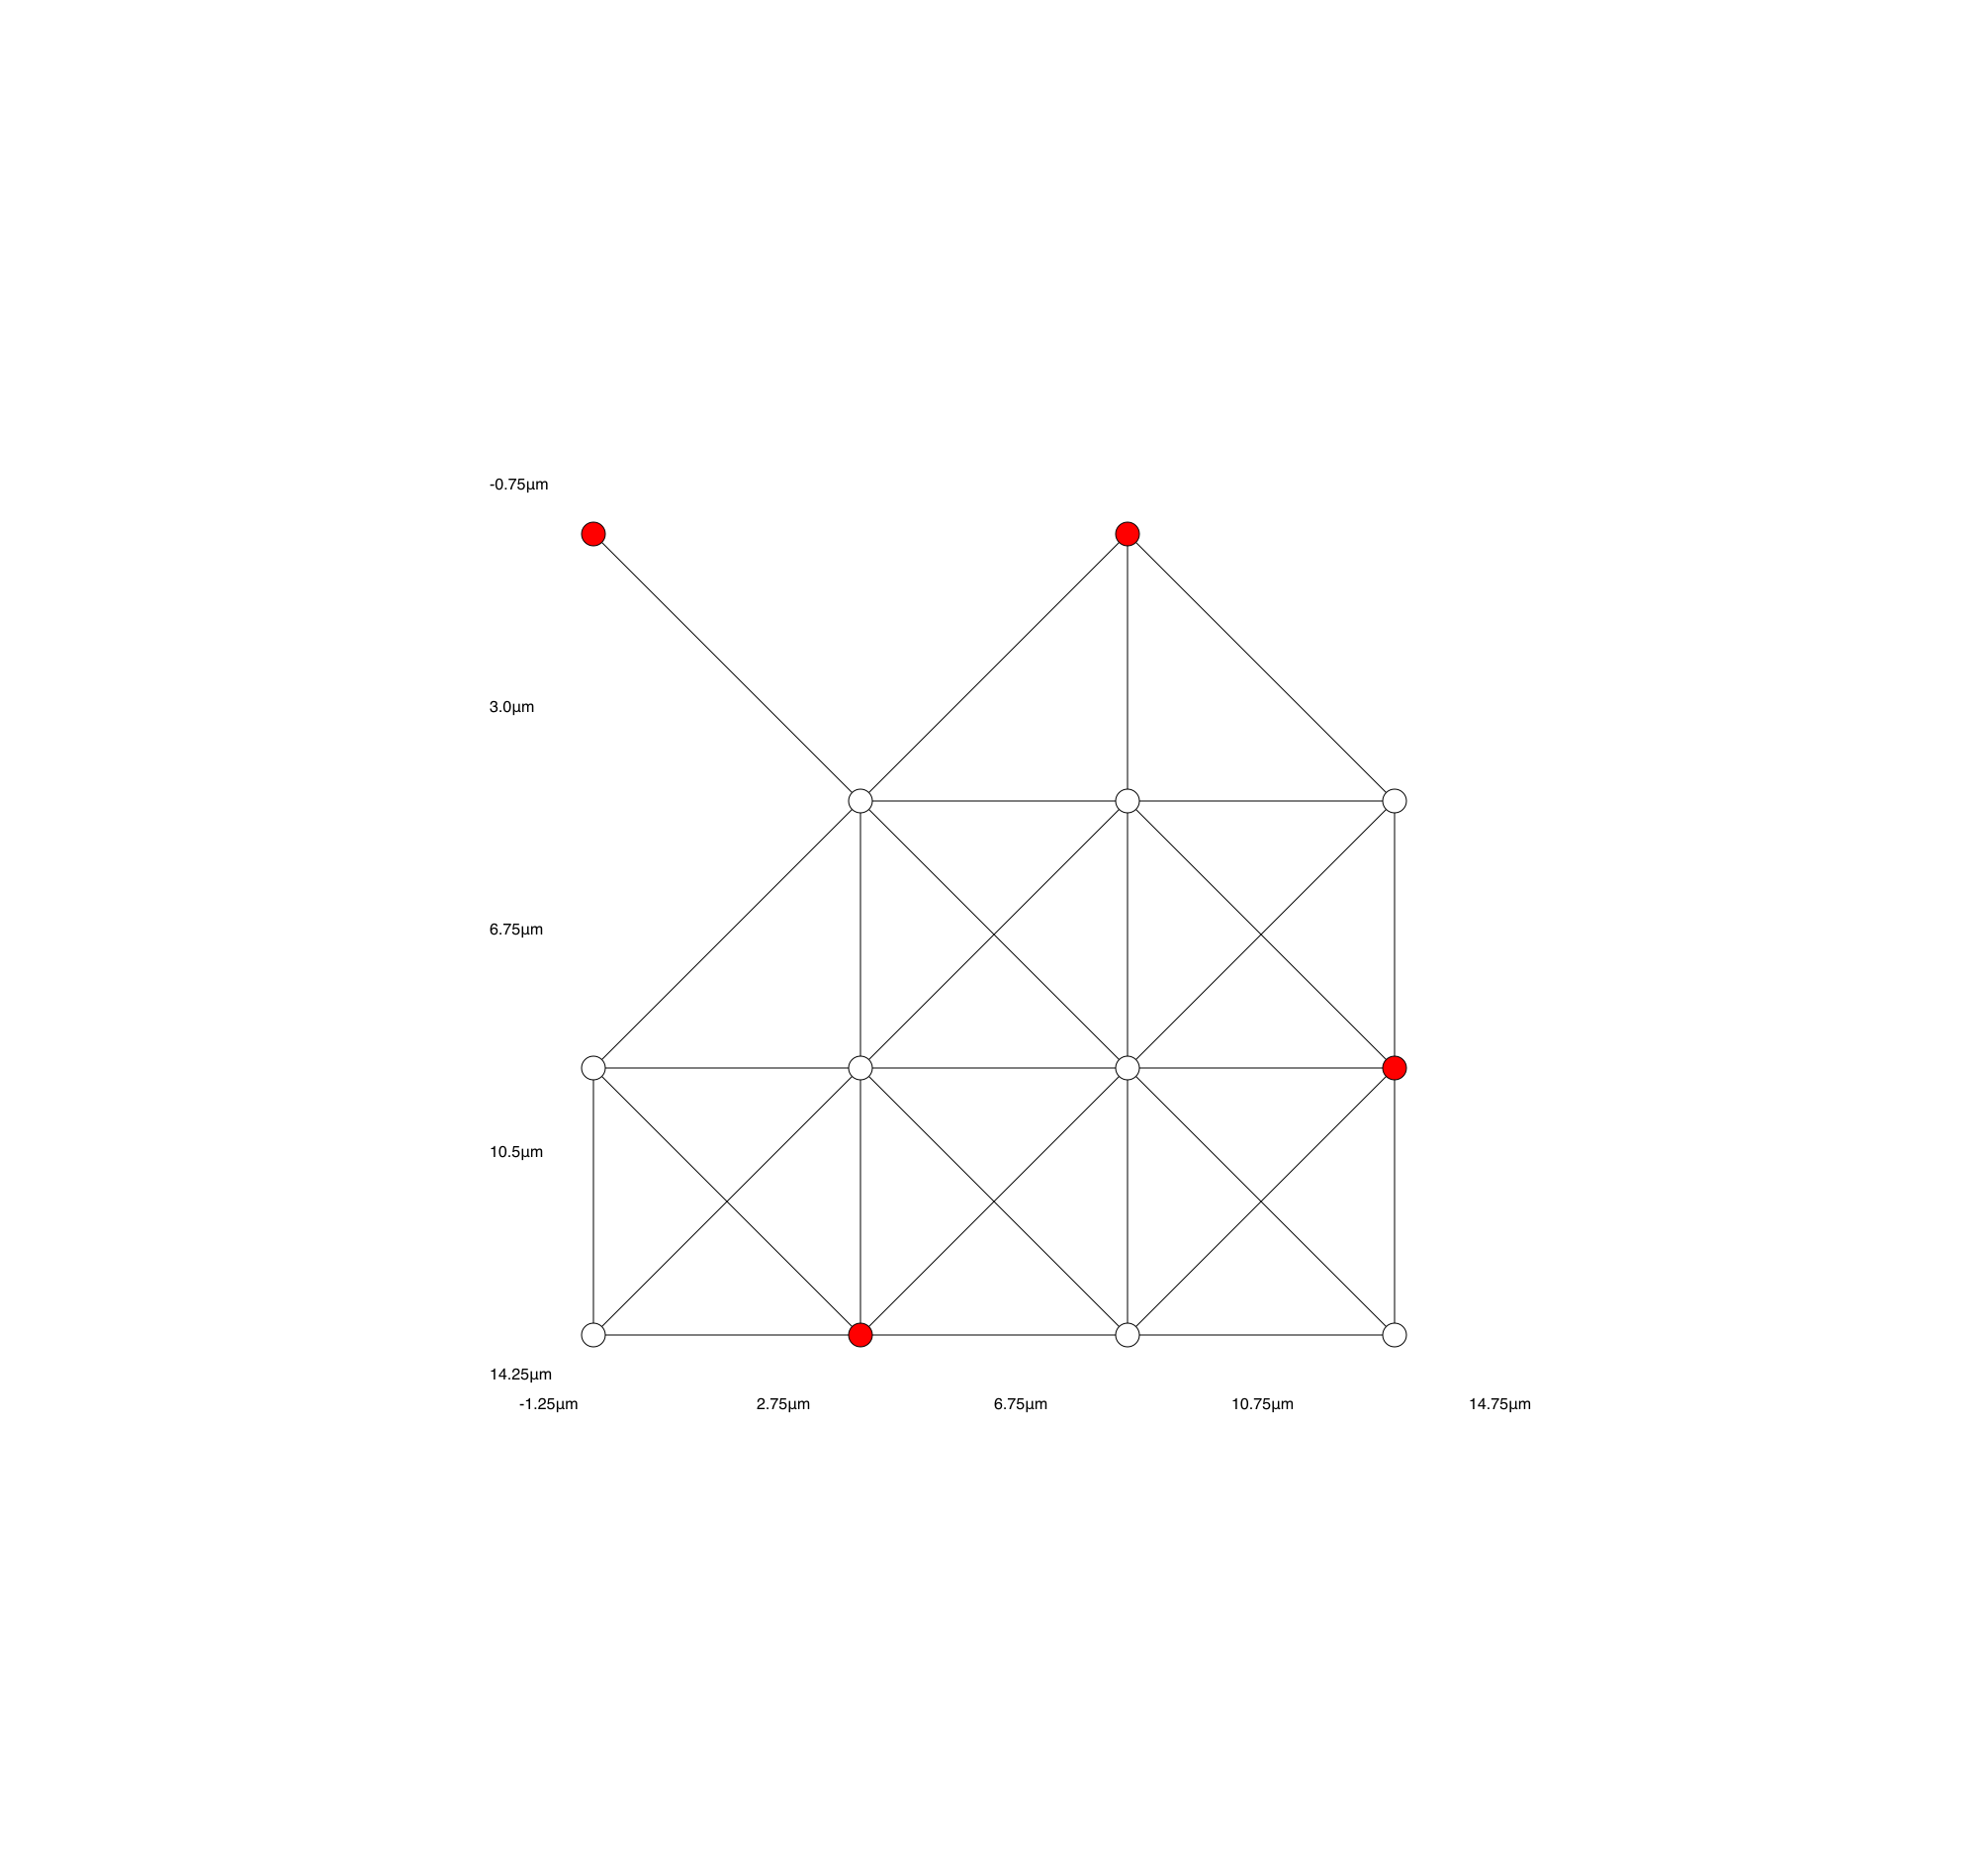

In [95]:
Bloqade.plot(atoms, blockade_radius = R; colors = [iszero(b) ? "white" : "red" for b in MIS_config])

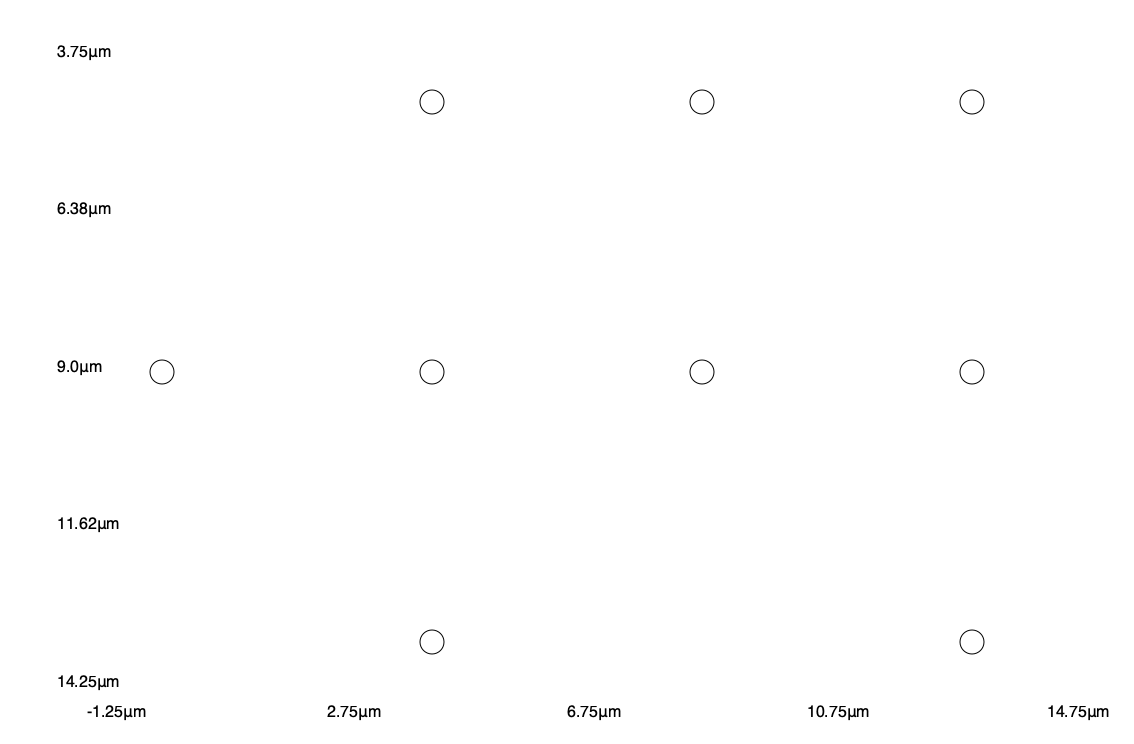

In [96]:
deleteat!(atoms, 1, 2, 10, 12)
atoms

101000011


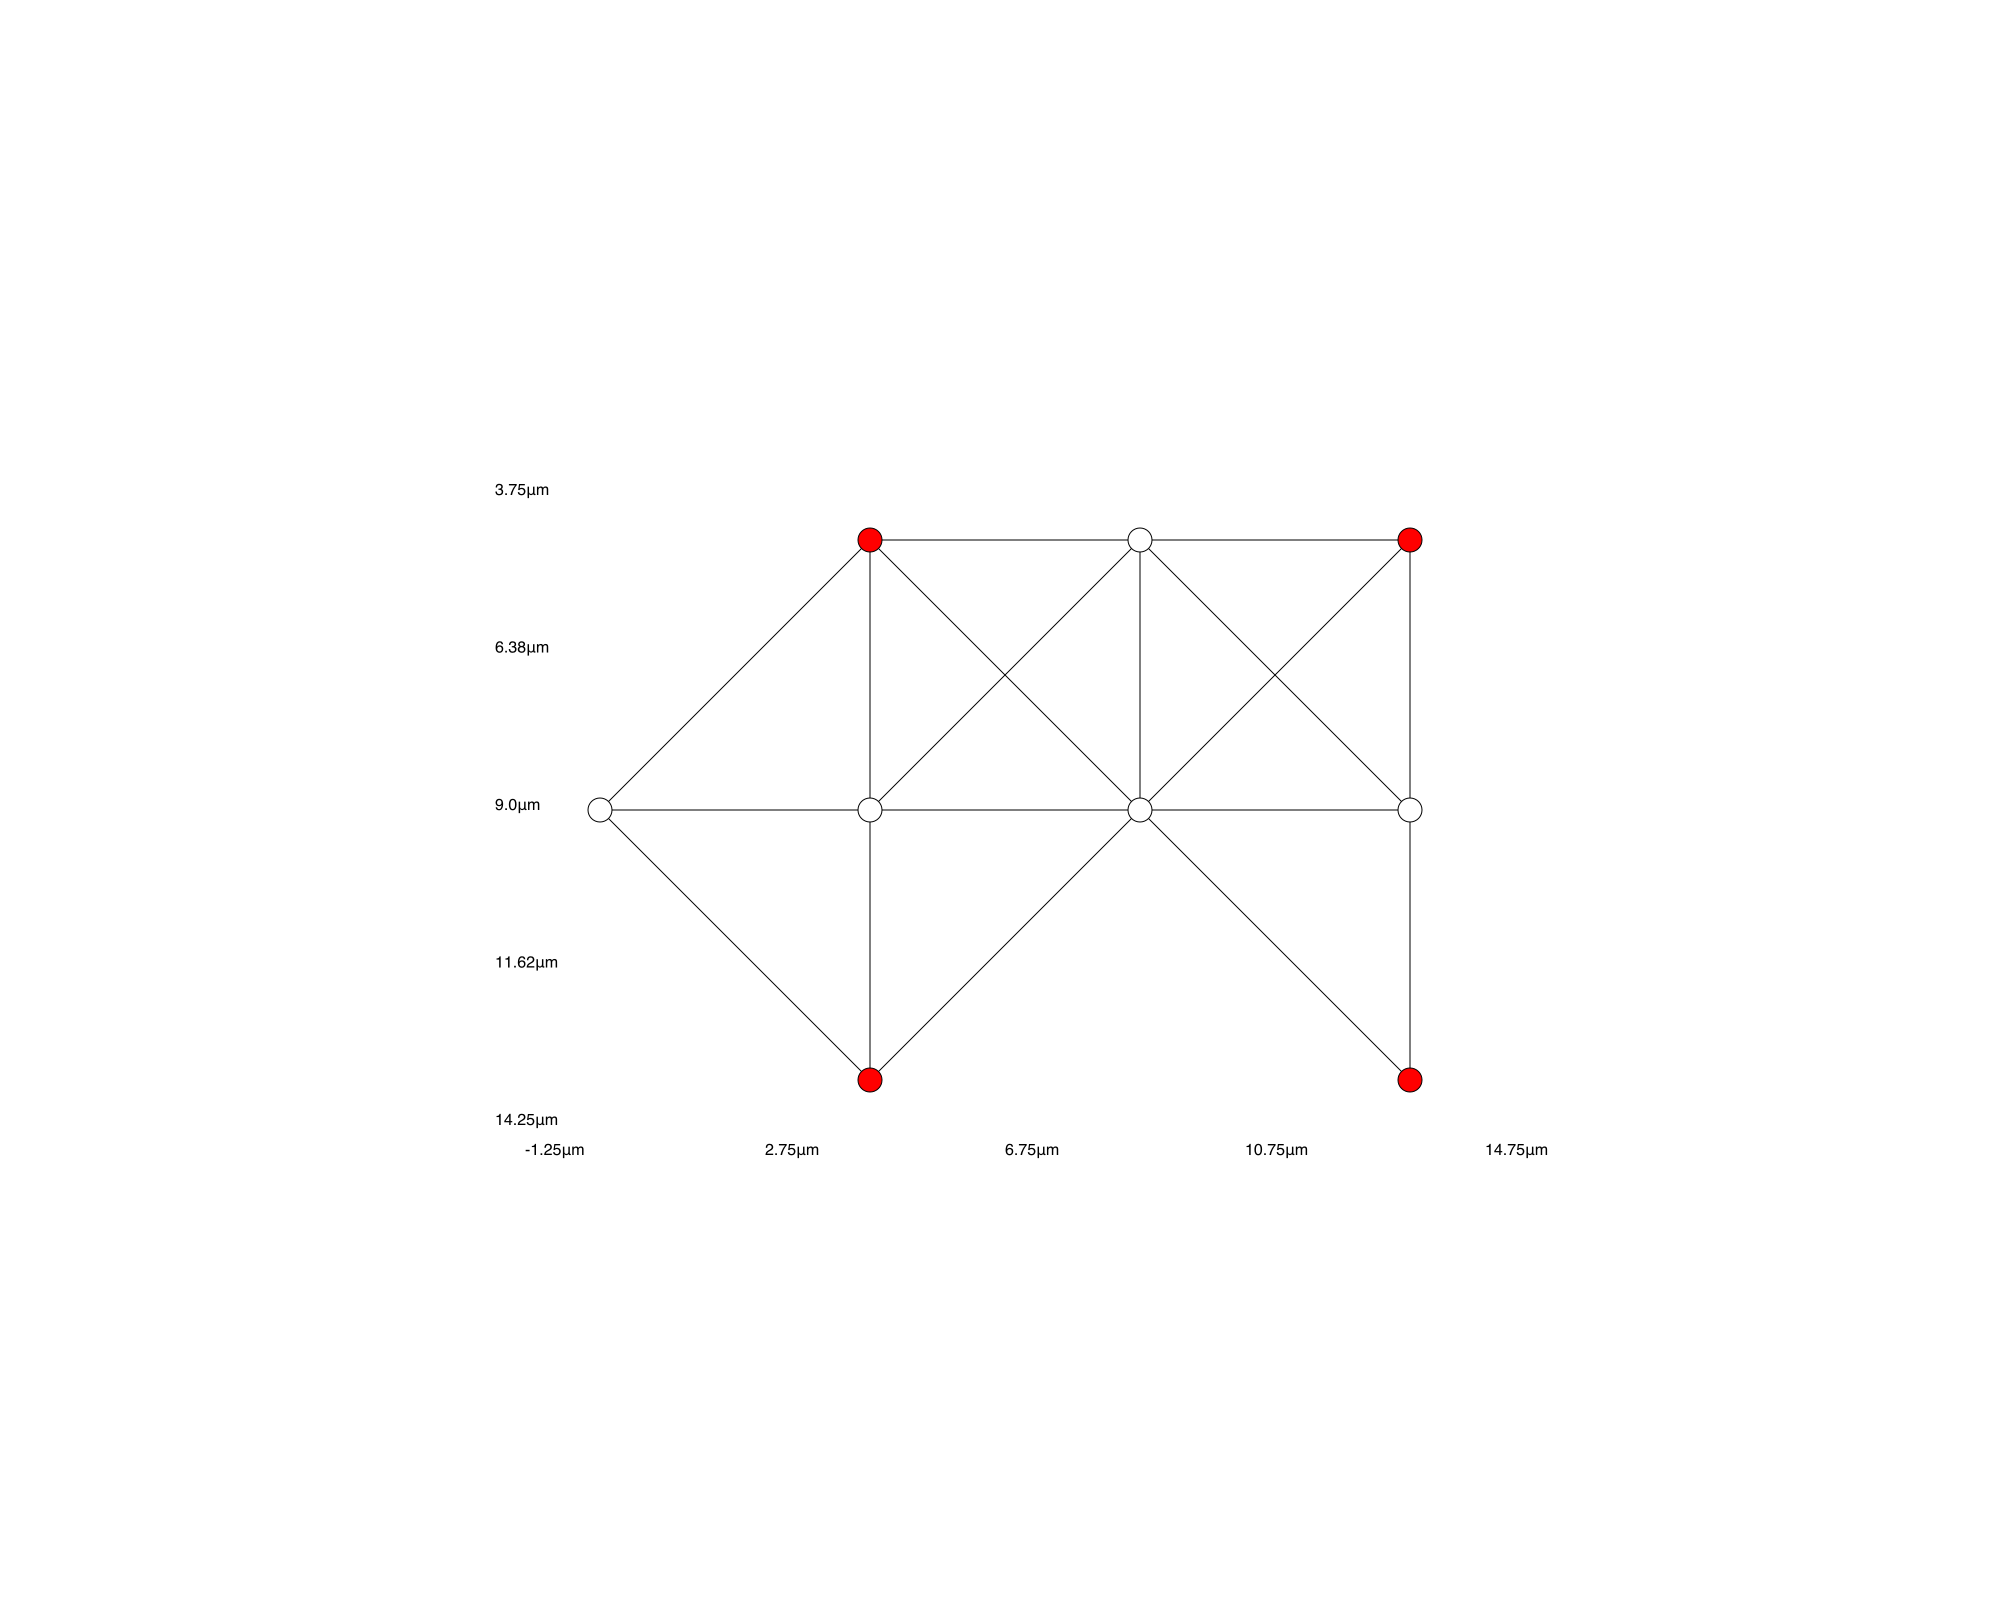

In [97]:
#atoms_in_grid = make_grid(atoms)
#sorted_atoms = collect_atoms(atoms_in_grid)

graph1 = BloqadeMIS.unit_disk_graph(atoms, R)
independent_set_problem1 = IndependentSet(graph1)
mis_size_and_counting1 = GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem1), ConfigsMax())[]
mi = mis_size_and_counting1.c[1]
println(mi)
Bloqade.plot(atoms, blockade_radius = R; colors = [iszero(b) ? "white" : "red" for b in mi])

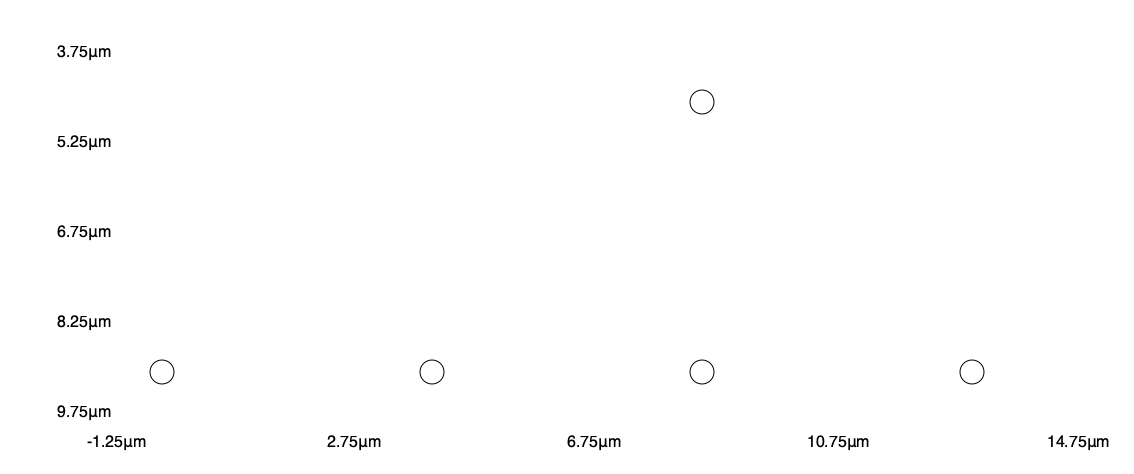

In [98]:
deleteat!(atoms, 1, 3, 8, 9)
atoms

00101


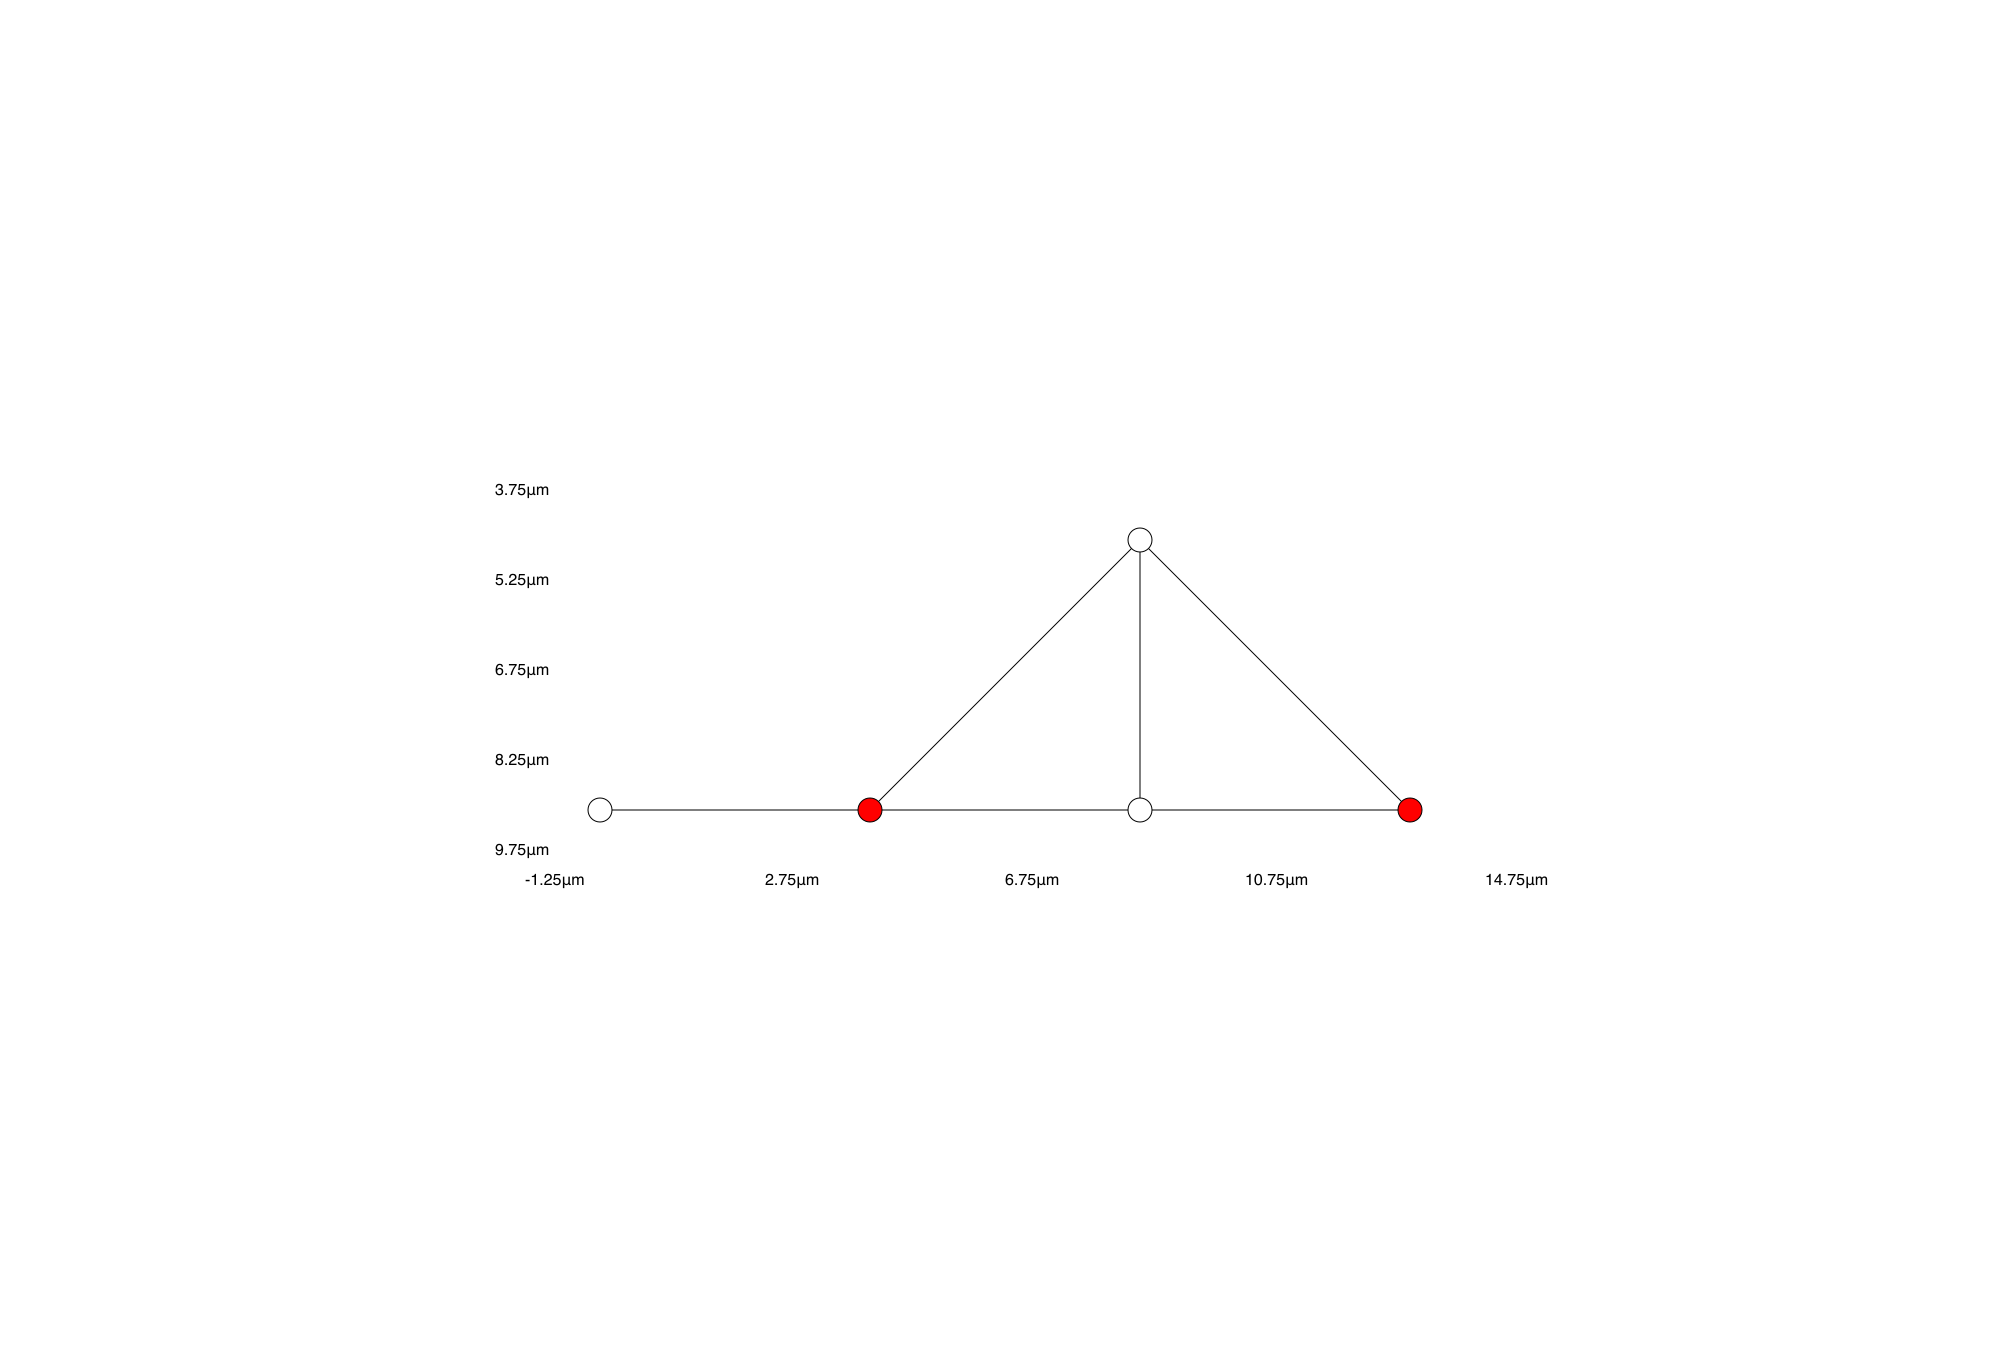

In [99]:
graph2 = BloqadeMIS.unit_disk_graph(atoms, R)
independent_set_problem2 = IndependentSet(graph2)
mis_size_and_counting2 = GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem2), ConfigsMax())[]
mi2 = mis_size_and_counting2.c[1]
println(mi2)
Bloqade.plot(atoms, blockade_radius = R; colors = [iszero(b) ? "white" : "red" for b in mi2])

In [100]:
length(atoms)

5

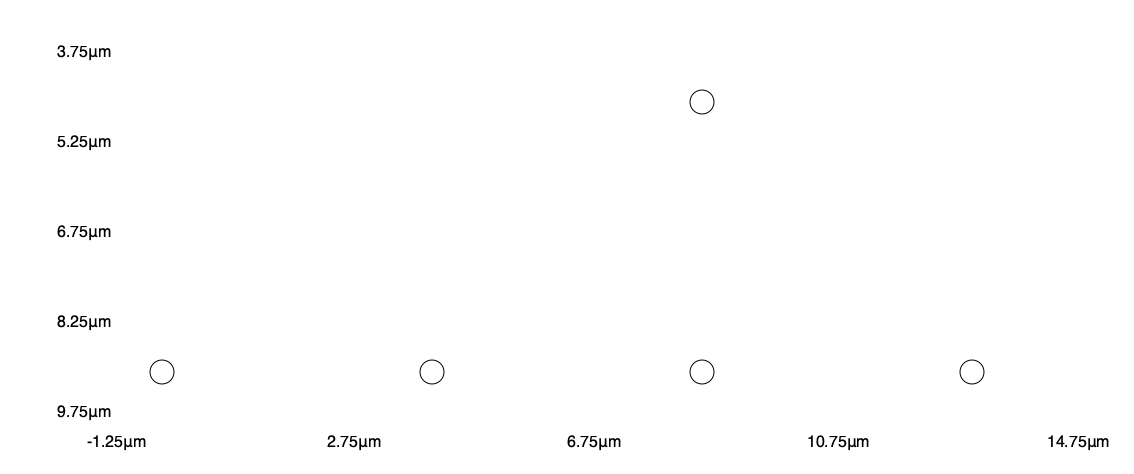

In [101]:
atoms

1100000010100
StaticBitVector{13, 1}
101000110
StaticBitVector{9, 1}
11001
StaticBitVector{5, 1}
10
StaticBitVector{2, 1}
1
StaticBitVector{1, 1}


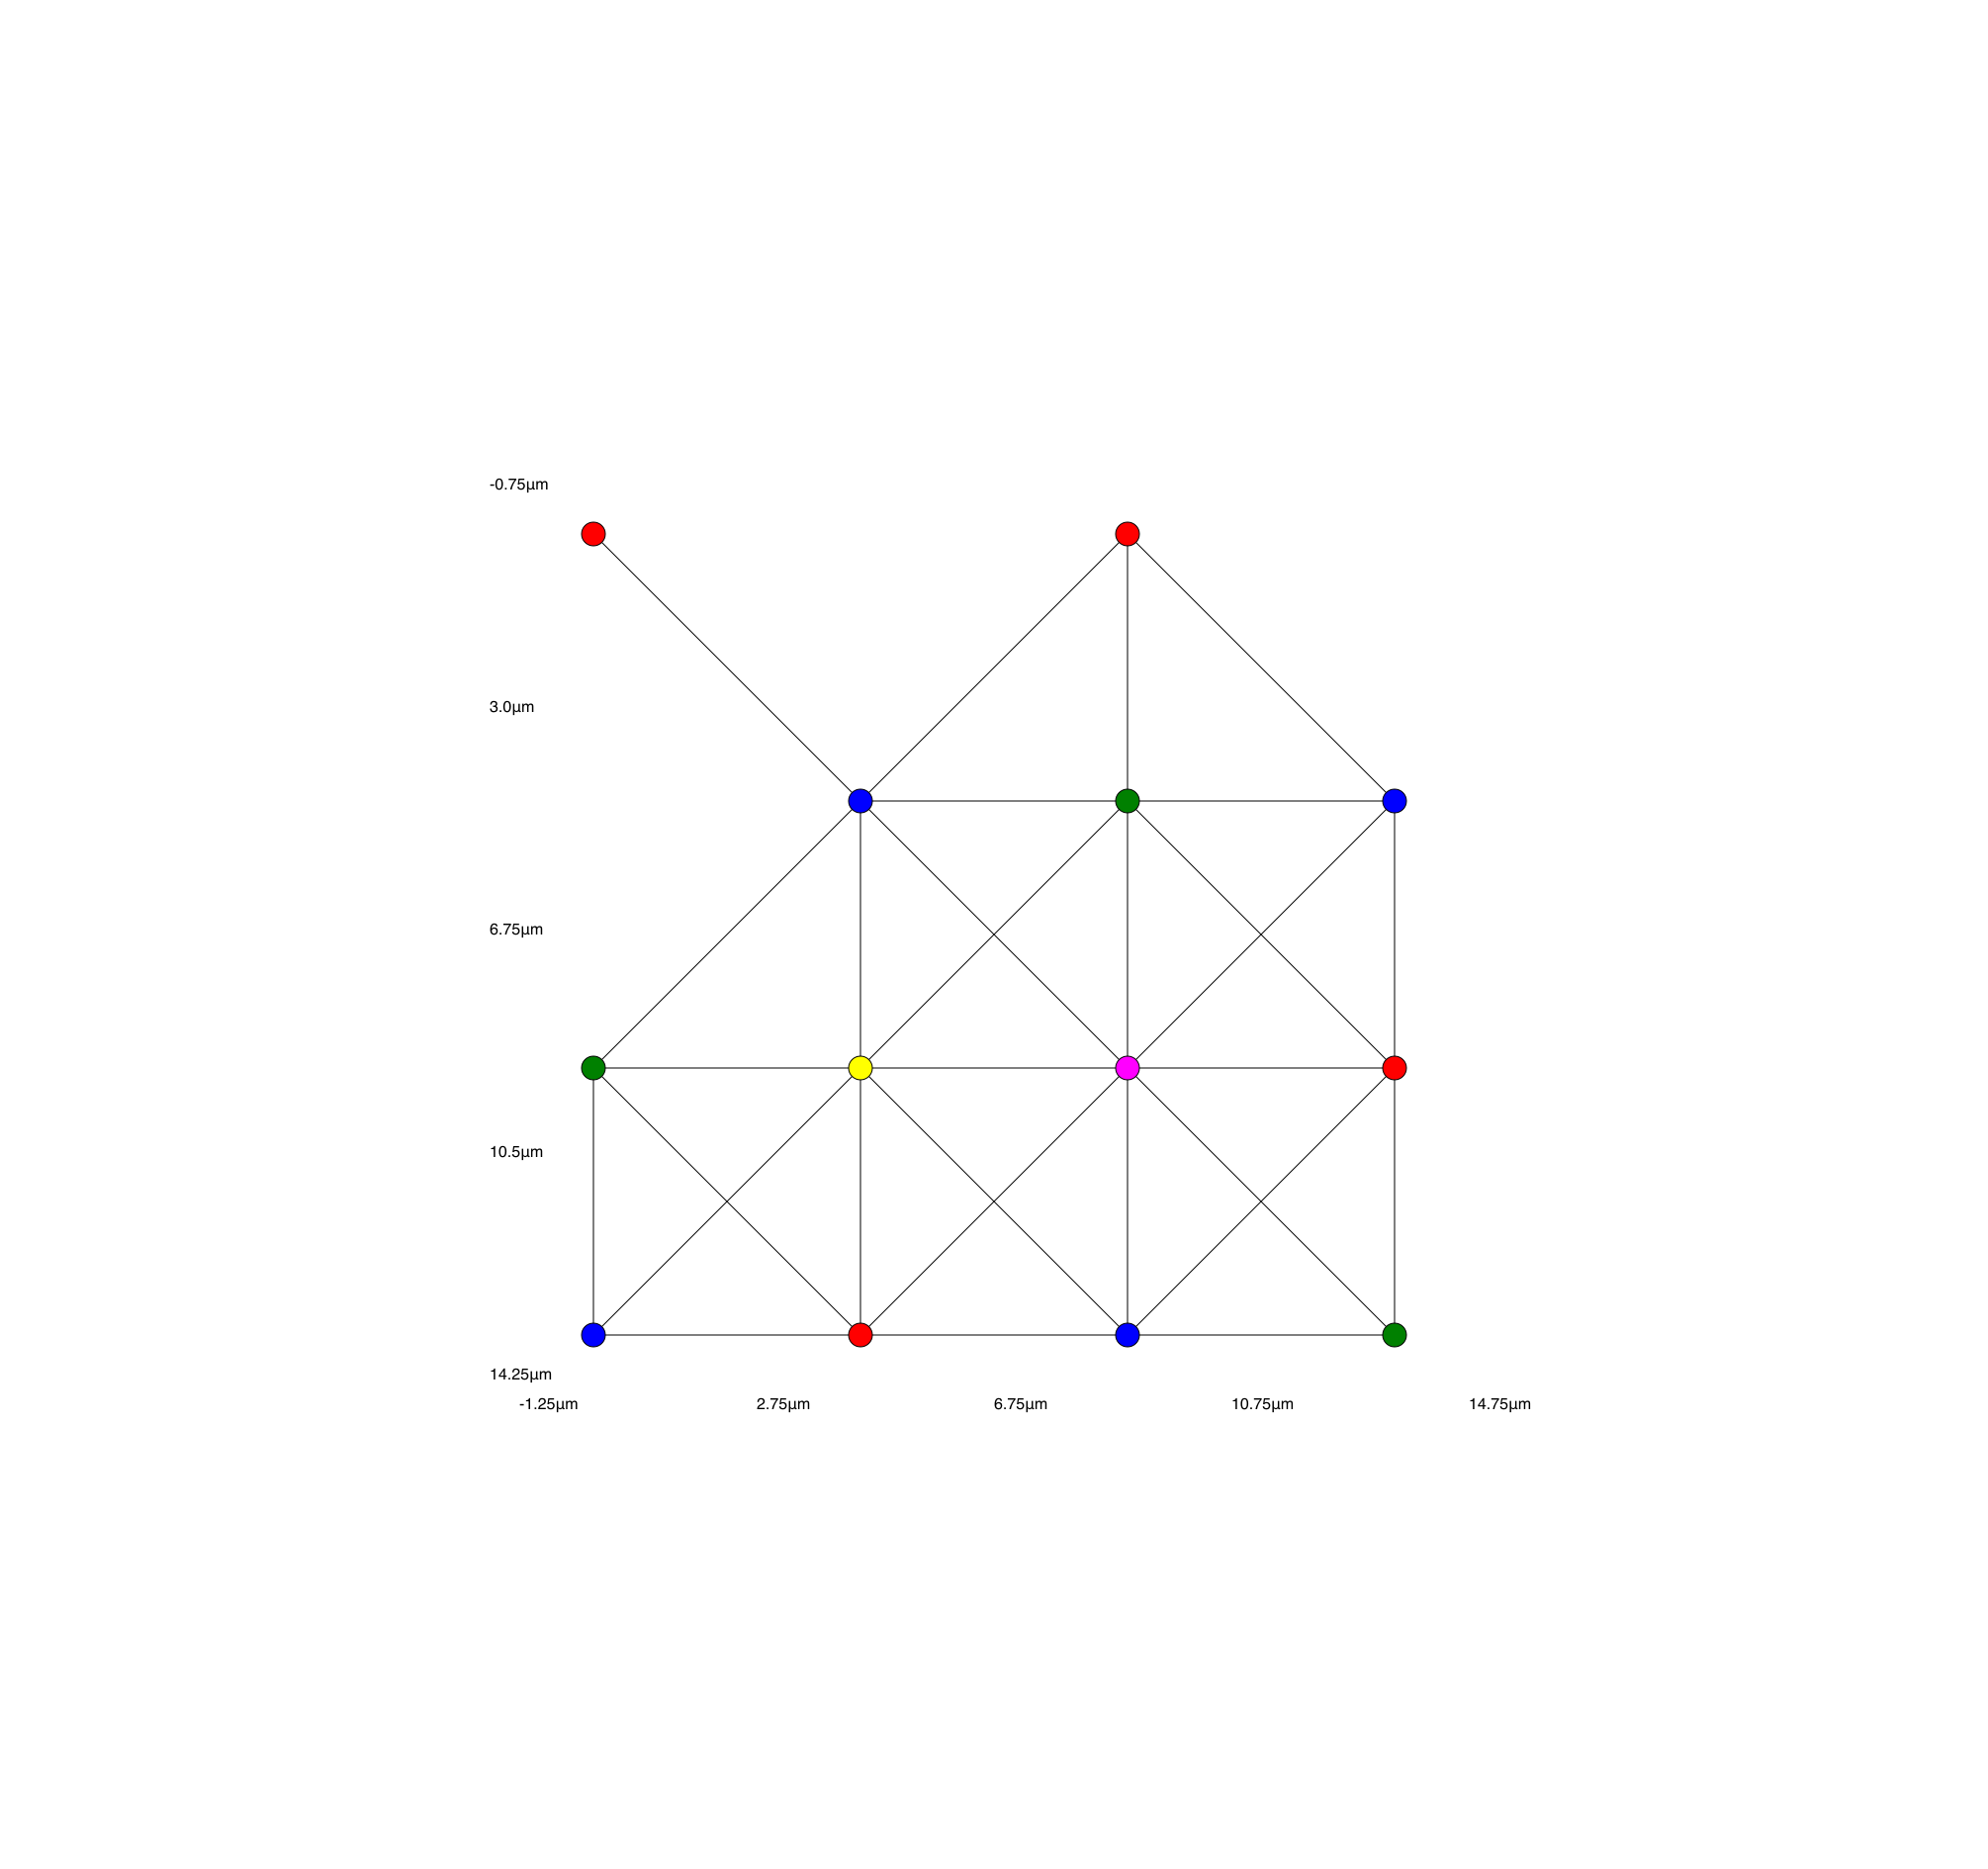

In [118]:
#Getting atoms
ensure_atomlist(a) = a isa Bloqade.AtomList ? a : Bloqade.AtomList(a)

Random.seed!(2)
atoms = generate_sites(SquareLattice(), 4, 4; scale = 4.5) |> random_dropout(0.2)
R = 7.5
#Bloqade.plot(atoms, blockade_radius = R)

#graph = BloqadeMIS.unit_disk_graph(atoms, R)
#independent_set_problem = IndependentSet(graph)
#mis_size_and_counting = GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem), ConfigsMax())[]
#MIS_config = mis_size_and_counting.c[1]
#Bloqade.plot(atoms, blockade_radius = R; colors = [iszero(b) ? "white" : "red" for b in MIS_config])
#deleteat!(atoms, 1, 2, 10, 12)
#atoms

color_counter = 1
atoms_full = copy(atoms)

colors_out = fill("white", length(atoms_full))

indices = collect(1:length(atoms))

palette = ["red", "blue", "green", "yellow", "magenta", "cyan", "orange", "purple"]



while length(atoms) != 0
    current_atoms = ensure_atomlist(atoms)

    
    
    graph = BloqadeMIS.unit_disk_graph(current_atoms, R)
    independent_set_problem = IndependentSet(graph)
    mis_size_and_counting = GenericTensorNetworks.solve(GenericTensorNetwork(independent_set_problem), ConfigsMax())[]
    MIS_config = mis_size_and_counting.c[1]
    println(MIS_config)
    println(typeof(MIS_config))
    #Bloqade.plot(atoms, blockade_radius = R; colors = [iszero(b) ? "white" : "red" for b in MIS_config])
    curr_color = palette[mod1(color_counter, length(palette))]
    counter = 1
    for b in MIS_config
        if !iszero(b)
            
            colors_out[indices[counter]] = curr_color
            
            deleteat!(atoms, counter)
            deleteat!(indices, counter)
            counter -= 1  
        end
        counter += 1
    end
    color_counter += 1
end
    
    
Bloqade.plot(ensure_atomlist(atoms_full), blockade_radius = R;
                 colors = colors_out)


#Bloqade.plot(atoms_full, blockade_radius = R; colors = []); 